# Nora Grigoryan 

## Weather check data 


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math 

In [3]:
data = pd.read_csv("Data.csv")
data

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic
...,...,...,...,...,...,...,...,...,...
923,3877568054,Yes,The Weather Channel,-,Very likely,45 - 59,Female,Prefer not to answer,Pacific
924,3877568053,Yes,The default weather app on your phone,-,Very likely,30 - 44,Female,Prefer not to answer,South Atlantic
925,3877566926,Yes,Local TV News,-,Somewhat likely,60+,Female,Prefer not to answer,Pacific
926,3877551536,No,-,-,-,-,-,-,-


In [4]:
# first of all lets check which proportion of our data check the weather 

data_1 = data[data["Do you typically check a daily weather report?"]=="Yes"]
data_1

count_1 = data_1['RespondentID'].count()
count = data['RespondentID'].count()

y= [count,count_1]
y

[928, 746]

In [5]:
#So we can conclude that approximately 80% people of our data check the weather which is informative,but for the analysis lets
# keep only yes answers to have the data to analyse 

data_1.head()

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


In [6]:
# After this we want to understand which is the most common way to check the weather so we are grouping our data
#and count the number of answers for each way 

data_grouped_way = data_1.groupby(data_1['How do you typically check the weather?']).count()[['RespondentID']]
data_grouped_way.sort_values(by = ['RespondentID'], ascending = False)

,RespondentID
How do you typically check the weather?,
The default weather app on your phone,170
A specific website or app (please provide the answer),157
Local TV News,148
The Weather Channel,122
Internet search,90
Newspaper,24
Radio weather,23
-,6
Newsletter,6


In [7]:
#As we can see the popular ways of checking the waether are the firts 5 rows so lets concentrate on them 

filter_criteria = ['The default weather app on your phone','A specific website or app (please provide the answer)','Local TV News',
                    'The Weather Channel','Internet search']
filtered_data = data_1[data_1['How do you typically check the weather?'].isin(filter_criteria)]

filtered_data.head()

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


In [8]:
indexNames = filtered_data[filtered_data['Age'] == '-'].index 
filtered_data.drop(indexNames , inplace=True)

C:\Users\grigo\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
# We are interesting in app on the smartwatch so lets understand how very likely,somewhat likely and etc. answers related to the age 
# We are grouping our data by that answers and age and count in which range we have what kind of answers 


data_grouped_freq = filtered_data.groupby(["If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",'Age']).count()[['RespondentID']]
data_grouped_freq.sort_values(by = ['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?','RespondentID'],ascending = False)

RespondentID
If you had a smartwatch (like the soon to be re... Age                  
Very unlikely                                      60+                44
                                                   45 - 59            40
                                                   30 - 44            38
                                                   18 - 29            18
Very likely                                        45 - 59           115
                                                   60+                83
                                                   30 - 44            66
                                                   18 - 29            58
Somewhat unlikely                                  45 - 59            15
                                                   60+                15
                                                   30 - 44             7
                                                   18 - 29             4
Somewhat likely                                    60+                53
                                                   45 - 59            47
                                                   30 - 44            46
                                                   18 - 29            37

In [39]:
d1 = data_grouped_freq.unstack()
d1 = d1.sort_values(by = ['Very likely', 'Somewhat likely'], axis = 1,ascending = False)
d1

RespondentID              \
Age                                                     45 - 59 60+ 30 - 44   
If you had a smartwatch (like the soon to be re...                            
Somewhat likely                                              47  53      46   
Somewhat unlikely                                            15  15       7   
Very likely                                                 115  83      66   
Very unlikely                                                40  44      38   

                                                            
Age                                                18 - 29  
If you had a smartwatch (like the soon to be re...          
Somewhat likely                                         37  
Somewhat unlikely                                        4  
Very likely                                             58  
Very unlikely                                           18

Text(0, 0.5, 'Frequency of checking')

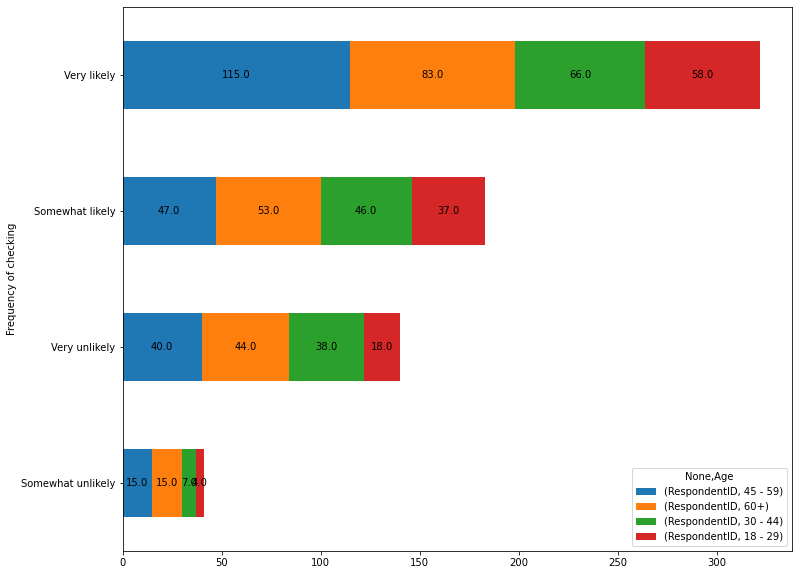

In [58]:
ax = d1.loc[['Somewhat unlikely','Very unlikely','Somewhat likely','Very likely'],:].plot(stacked=True, kind='barh',figsize=(12,10))


for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The width of the bar is also not pixels, it's the
    # number of animals. So we can use it as the label!
    label_text = width
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height/2
    ax.text(label_x, label_y, label_text, ha='center', va='center')
    
plt.ylabel('Frequency of checking')

In [67]:
#This is very informative, but maybe we have more answers from 45-59 range so it would be better to understand the percantage 

total_18 = d1.iloc[:,3].sum()
total_30 = d1.iloc[:,2].sum()
total_60 = d1.iloc[:,1].sum()
total_45 = d1.iloc[:,0].sum()

s_likely_p = [d1.iloc[0,0]/total_45,d1.iloc[0,1]/total_60,d1.iloc[0,2]/total_30,d1.iloc[0,3]/total_18]
s_unlikely_p = [d1.iloc[1,0]/total_45,d1.iloc[1,1]/total_60,d1.iloc[1,2]/total_30,d1.iloc[1,3]/total_18]
v_likely_p = [d1.iloc[2,0]/total_45,d1.iloc[2,1]/total_60,d1.iloc[2,2]/total_30,d1.iloc[2,3]/total_18]
v_unlikely_p = [d1.iloc[3,0]/total_45,d1.iloc[3,1]/total_60,d1.iloc[3,2]/total_30,d1.iloc[3,3]/total_18]
lst = [s_likely_p,s_unlikely_p,v_likely_p,v_unlikely_p]
lst

[[0.21658986175115208,
  0.2717948717948718,
  0.2929936305732484,
  0.3162393162393162],
 [0.06912442396313365,
  0.07692307692307693,
  0.044585987261146494,
  0.03418803418803419],
 [0.5299539170506913,
  0.4256410256410256,
  0.42038216560509556,
  0.49572649572649574],
 [0.18433179723502305,
  0.22564102564102564,
  0.24203821656050956,
  0.15384615384615385]]

Now with percentes we can say that approximately 80% of 18-29 age people very likely or somewhat likely would check the weather 
on the smartwatch app
73% of 45-59 age people very likely or somewhat likely would check the weather on smartwatch app
70% of 60+ would check and 72% of 30-44 would check the weather on smartwatch app 

Now we are interesting in very unlikely to understand if this relates to age or not 
So approximately 25% of 45-59 age people wouldn't check the weather on the smartwatch app 
29,5% of 60+ wouldn't check 
28,4% of 30-44 age people 
18,4% of 18-29 age people 

So even with the graph we see that the most proportion of the very likely answers has the range 45-59, it is the second with perecentage. So only 73% of 45-59 age people would check the weather with smartwatch app. And even in the graph the proportion of 18-29 age people is the third one, with percent 80% people of 18-29 age would check the weather on the smartwatch app. 

In [69]:
d1_percent = pd.DataFrame(lst, index =['Somewhat likely', 'Somewhat unlikely', 'Very likely','Very unlikely'], 
                                              columns =['45-59','60+','30-44','18-29']) 
d1_percent = round(d1_percent,3)
d1_percent

,45-59,60+,30-44,18-29
Somewhat likely,0.217,0.272,0.293,0.316
Somewhat unlikely,0.069,0.077,0.045,0.034
Very likely,0.530,0.426,0.420,0.496
Very unlikely,0.184,0.226,0.242,0.154


In [54]:
# now we are interesting how age relates the way of checking the weather 
# we would like to show for each way of checking the ages 

data_grouped_freq_2 = filtered_data.groupby(['How do you typically check the weather?','Age']).count()[['RespondentID']]
data_grouped_freq_2.sort_values(by = ['How do you typically check the weather?','RespondentID'],ascending = False)


RespondentID
How do you typically check the weather?            Age                  
The default weather app on your phone              30 - 44            51
                                                   18 - 29            45
                                                   45 - 59            44
                                                   60+                30
The Weather Channel                                45 - 59            49
                                                   60+                30
                                                   30 - 44            22
                                                   18 - 29            20
Local TV News                                      60+                65
                                                   45 - 59            48
                                                   30 - 44            27
                                                   18 - 29             8
Internet search                                    45 - 59            27
                                                   60+                26
                                                   18 - 29            19
                                                   30 - 44            18
A specific website or app (please provide the a... 45 - 59            49
                                                   60+                44
                                                   30 - 44            39
                                                   18 - 29            25

In [55]:
d2 = data_grouped_freq_2.unstack()

d2.sort_values(by = ['The default weather app on your phone'], axis = 1,ascending = False)

RespondentID          \
Age                                                     30 - 44 18 - 29   
How do you typically check the weather?                                   
A specific website or app (please provide the a...           39      25   
Internet search                                              18      19   
Local TV News                                                27       8   
The Weather Channel                                          22      20   
The default weather app on your phone                        51      45   

                                                                
Age                                                45 - 59 60+  
How do you typically check the weather?                         
A specific website or app (please provide the a...      49  44  
Internet search                                         27  26  
Local TV News                                           48  65  
The Weather Channel                                     49  30  
The default weather app on your phone                   44  30

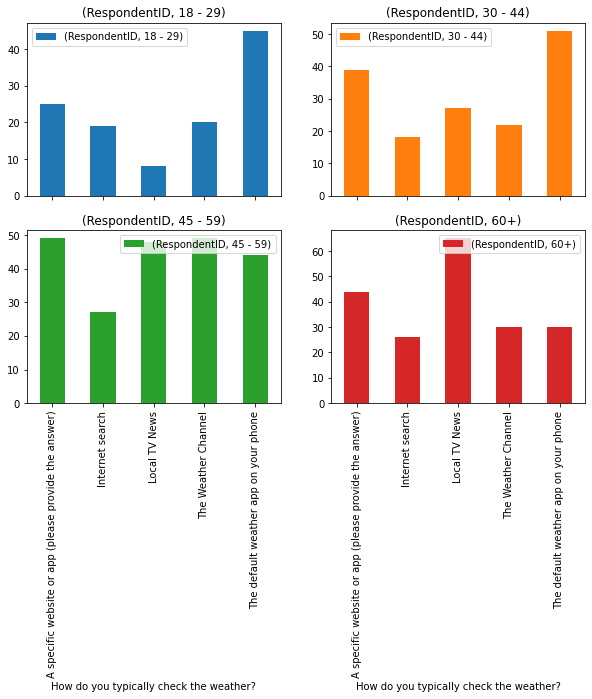

In [86]:
#So now we can see the popular ways of checking the weather for each age group 
#like for 18-29 age group the most popular way is the default weather app on the phone 
#for 45-59 all ways of checking are popular besides internet search 
#Even though 70% of 60+ people answered they would likely check weather on smartwatch on this graph wee see the most popular way is local TV news 


figure ,axes = d2.plot(subplots=True, kind = 'bar',layout=(2,2), figsize=(10, 7))

In [88]:
#Smartwatches aren't cheap , so the family must have at least avarage income,
#but first of all lets drop the rows where we don't have any information about income 


data_income = filtered_data[filtered_data['How much total combined money did all members of your HOUSEHOLD earn last year?']!='Prefer not to answer']
data_income

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic
5,3886937140,Yes,A specific website or app (please provide the ...,AccuWeather App,Somewhat likely,18 - 29,Male,"$100,000 to $124,999",West South Central
6,3886923931,Yes,The Weather Channel,-,Very unlikely,30 - 44,Male,"$25,000 to $49,999",West South Central
...,...,...,...,...,...,...,...,...,...
914,3877579781,Yes,The Weather Channel,-,Very unlikely,30 - 44,Male,"$25,000 to $49,999",East South Central
915,3877579062,Yes,The Weather Channel,-,Very unlikely,45 - 59,Female,"$75,000 to $99,999",Pacific
917,3877573011,Yes,Local TV News,-,Somewhat unlikely,45 - 59,Female,"$25,000 to $49,999",East South Central
918,3877572488,Yes,A specific website or app (please provide the ...,weather app on iphone,Very likely,30 - 44,Female,"$125,000 to $149,999",South Atlantic


In [92]:
#The average income per household in USA in 2019 was 68000$. So we filter our data under 68000 and above 68000.

above = ['$75,000 to $99,999','$100,000 to $124,000','$125,000 to $149,999','$150,000 to $174,999','$175,000 to $199,999','$200,000+']
data_above = data_income[data_income['How much total combined money did all members of your HOUSEHOLD earn last year?'].isin(above)]

data_above.head()

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic
9,3886848806,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$150,000 to $174,999",West North Central
15,3886283555,Yes,Internet search,-,Somewhat likely,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
21,3886201383,Yes,Local TV News,-,Very likely,30 - 44,Male,"$150,000 to $174,999",West South Central
25,3886114640,Yes,A specific website or app (please provide the ...,Weather.com,Very unlikely,30 - 44,Male,"$75,000 to $99,999",Middle Atlantic


In [98]:
data_grouped_freq_3 = data_above.groupby(['How much total combined money did all members of your HOUSEHOLD earn last year?','If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?']).count()[['RespondentID']]

data_grouped_freq_3

RespondentID
How much total combined money did all members o... If you had a smartwatch (like the soon to be re...              
$125,000 to $149,999                               Somewhat likely                                                8
                                                   Very likely                                                   19
                                                   Very unlikely                                                  6
$150,000 to $174,999                               Somewhat likely                                               10
                                                   Somewhat unlikely                                              2
                                                   Very likely                                                   14
                                                   Very unlikely                                                  6
$175,000 to $199,999                               Somewhat likely                                                3
                                                   Somewhat unlikely                                              1
                                                   Very likely                                                   10
                                                   Very unlikely                                                  3
$75,000 to $99,999                                 Somewhat likely                                               16
                                                   Somewhat unlikely                                              6
                                                   Very likely                                                   37
                                                   Very unlikely                                                 17

In [99]:
d3 = data_grouped_freq_3.unstack()
d3

RespondentID  \
If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device? Somewhat likely   
How much total combined money did all members o...                                                                                                             
$125,000 to $149,999                                                                                                                                     8.0   
$150,000 to $174,999                                                                                                                                    10.0   
$175,000 to $199,999                                                                                                                                     3.0   
$75,000 to $99,999                                                                                                                                      16.0   

                                                                                                                                                                \
If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device? Somewhat unlikely   
How much total combined money did all members o...                                                                                                               
$125,000 to $149,999                                                                                                                                       NaN   
$150,000 to $174,999                                                                                                                                       2.0   
$175,000 to $199,999                                                                                                                                       1.0   
$75,000 to $99,999                                                                                                                                         6.0   

                                                                                                                                                          \
If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device? Very likely   
How much total combined money did all members o...                                                                                                         
$125,000 to $149,999                                                                                                                                19.0   
$150,000 to $174,999                                                                                                                                14.0   
$175,000 to $199,999                                                                                                                                10.0   
$75,000 to $99,999                                                                                                                                  37.0   

                                                                                                                                                            
If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device? Very unlikely  
How much total combined money did all members o...                                                                                                          
$125,000 to $149,999                                                                                                                                   6.0  
$150,000 to $174,999                                                                                                                                   6.0  
$175,000 t

Text(0, 0.5, 'Number of people')

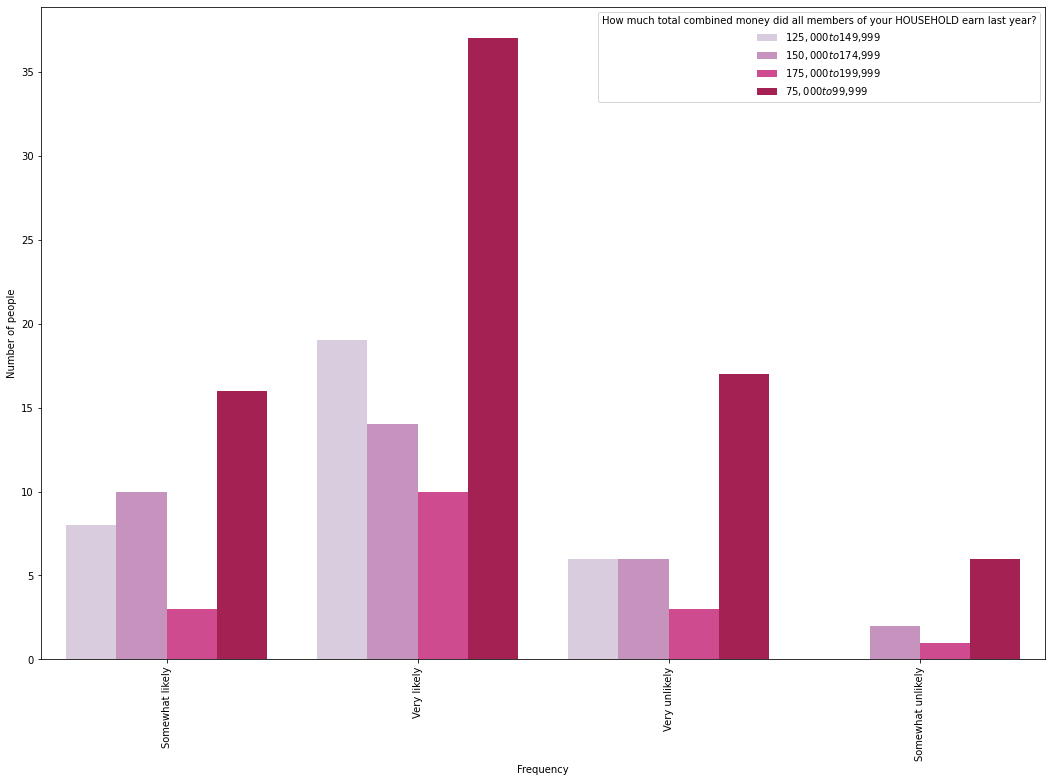

In [120]:
plt.figure(figsize=(18,12))
graph = sns.barplot(x = 'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?',y = 'RespondentID',hue = 'How much total combined money did all members of your HOUSEHOLD earn last year?',data = data_grouped_freq_3.reset_index(),palette = 'PuRd')
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
plt.xlabel('Frequency')
plt.ylabel('Number of people')


In [121]:
data_grouped_freq_4 = data_above.groupby(['How much total combined money did all members of your HOUSEHOLD earn last year?','Age']).count()[['RespondentID']]


data_grouped_freq_4

RespondentID
How much total combined money did all members o... Age                  
$125,000 to $149,999                               18 - 29             4
                                                   30 - 44             6
                                                   45 - 59            10
                                                   60+                13
$150,000 to $174,999                               18 - 29             2
                                                   30 - 44             9
                                                   45 - 59            13
                                                   60+                 8
$175,000 to $199,999                               30 - 44             2
                                                   45 - 59            11
                                                   60+                 4
$75,000 to $99,999                                 18 - 29             9
                                                   30 - 44            17
                                                   45 - 59            28
                                                   60+                22

In [122]:
d4 = data_grouped_freq_4.unstack()
d4

RespondentID          \
Age                                                     18 - 29 30 - 44   
How much total combined money did all members o...                        
$125,000 to $149,999                                        4.0     6.0   
$150,000 to $174,999                                        2.0     9.0   
$175,000 to $199,999                                        NaN     2.0   
$75,000 to $99,999                                          9.0    17.0   

                                                                  
Age                                                45 - 59   60+  
How much total combined money did all members o...                
$125,000 to $149,999                                  10.0  13.0  
$150,000 to $174,999                                  13.0   8.0  
$175,000 to $199,999                                  11.0   4.0  
$75,000 to $99,999                                    28.0  22.0

Text(0, 0.5, 'Number of people')

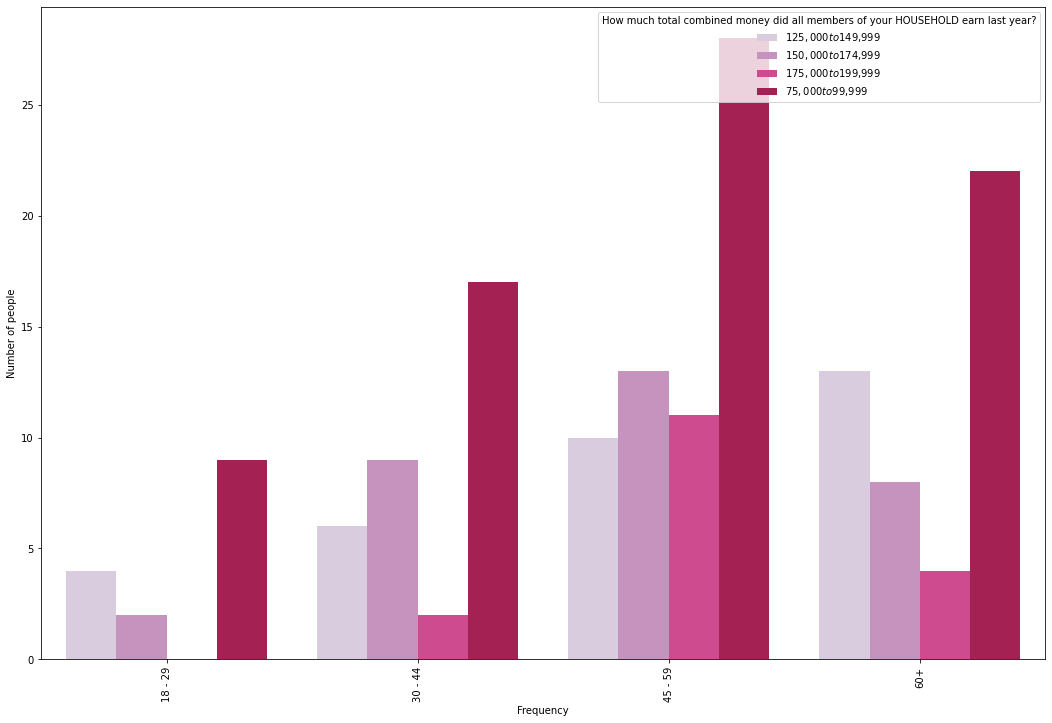

In [124]:
#We are interesting to understand the proportion of age group in our target income groups 

plt.figure(figsize=(18,12))
graph = sns.barplot(x = 'Age',y = 'RespondentID',hue = 'How much total combined money did all members of your HOUSEHOLD earn last year?',data = data_grouped_freq_4.reset_index(),palette = 'PuRd')
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
plt.xlabel('Frequency')
plt.ylabel('Number of people')

# Summary

First of all the popular ways to check the weather are The default weather app on the phone, A specific website or app, Local TV News, The weather channel.So we can conclude that the app even on the smartwatch has all chances to have a success.

On the first graph we have seen that that in very likely and somewhat likely answers the biggest propotion have 45-59,60+age groups.However we have also seen on another graph that 60+ age group prefer to check the weather on the local tv news.So we must concentrate on the 45-59 age group which is the biggest group and has the biggest proportion in very likely and somewhat likely answers.

But on the other hand we want to know the proportion in each age group, to see very likely's and somewhat likely's proportions in each group.So the very likely and somewhat likely answer have the biggest proportion, approximately 80% of the 18-29 age group. So we also need to concentrate on this age group, this isn't the biggest group but this has the highest percentage so we can say 80% of this age group prefer to check the weather on the smartwatch app.And the second group is 45-59 , approximately 73% of this age group would very likely check the weather on the smartwatch app. 

The last thing that we can conclude the biggest group of our costumers in 75000-99000 income group, because we need customers that have average income, so our target groups are 75000-99000,125000-149000.Why we need to concentrate on this income group ? Because they are big than other groups and have enough income to afford them smartwacthes. 

So we need to make app on the smartwacthes easy to use for 45-59 age group as they are the biggest group,have the second biggest percentage of checking the weather very likely on the smartwatch app and have the biggest proportion in our target income groups. So based on our analysis our app can be successfull if they can easy use them,as our target 45-59 age group based on the very likely and somewhat likely answer percentage, based on the way of checking the weather, based on the proportion of our target income group. 

Also it must have  the low price to be afordable for 18-29 age and our target income group,but even though the highest percentage of checking the weather by the smartwacth has this group, the smallest proportion in our income group is the 18-29 age group too.
